In [23]:
PATH_SIMULATED_CATALOGUE = 'Sim_imageKIds_params_2.fits'
PATH_Sim_matched_catalogue = 'KIDS_Sim_DRUID_Match_peak.fits'
PATH_Sim_matched_ProFound = 'KiDS_Sim_ProFound_Matched_seed_0.5.fits'
PATH_Sim_matched_DRUID_psf_corr = '/home/rs17612/GitHub/DRUID/DRUID_KIDS_Cat_SIMS_peak_PSF_MODE_seed_0.5acr.fits'
Provided_cat_path = '/data/typhon2/Rhys/data/KiDS/ADP.2019-02-11T13:02:26.716.fits'

# open simulated catalogue
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('~/GitHub/mplrc_sotiria.mplstyle')


simulated_catalogue = Table.read(PATH_SIMULATED_CATALOGUE).to_pandas()
matched_catalogue = Table.read(PATH_Sim_matched_DRUID_psf_corr).to_pandas()
matched_catalogue_ProFound = Table.read(PATH_Sim_matched_ProFound).to_pandas()
Provided_cat = Table.read(Provided_cat_path).to_pandas()

def ABmag(flux):

    return -2.5*np.log10(flux)


# calcualte integrated flux by creating the modelled gaussian


def generate_2d_gaussian(A,shape, center, sigma_x, sigma_y, angle_deg=0,norm=True):
    """
    
    Generate a 2D elliptical Gaussian distribution on a 2D array.

    Parameters:
    
        shape (tuple): Shape of the output array (height, width).
        center (tuple): Center of the Gaussian distribution (x, y).
        sigma_x (float): Standard deviation along the x-axis.
        sigma_y (float): Standard deviation along the y-axis.
        angle_deg (float): Rotation angle in degrees (default is 0).

    Returns:
    
        ndarray: 2D array containing the Gaussian distribution.
    
    """
    x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
    x_c, y_c = center
    angle_rad = np.radians(angle_deg)

    # Rotate coordinates
    
    x_rot = (x - x_c) * np.cos(angle_rad) - (y - y_c) * np.sin(angle_rad)
    y_rot = (x - x_c) * np.sin(angle_rad) + (y - y_c) * np.cos(angle_rad)

    # Calculate Gaussian values
    
    gaussian = A *np.exp(-(x_rot ** 2 / (2 * sigma_x ** 2) + y_rot ** 2 / (2 * sigma_y ** 2)))

    if norm:
        return gaussian / (2 * np.pi * sigma_x * sigma_y) 
    else:
        return gaussian



# matched_catalogue['Flux_total_new'] = (matched_catalogue['Flux_total']*EFFGAIN*EXPTIME - RONoise(EFFRON,EFFGAIN,matched_catalogue['Area']))
# #print(matched_catalogue['Flux_total'])


# matched_catalogue['Noise'] = matched_catalogue.apply(NOISE,local_ng=local_ng,axis=1)
# #print(matched_catalogue['Noise'])
# row = matched_catalogue.iloc[0]
# print("flux_total ADU/s:",row['Flux_total'])
# print("Flux total Electrons:",row['Flux_total']*EFFGAIN*EXPTIME)
# print("new flux total",row['Flux_total_new'])
# print("RONoise",RONoise(EFFRON,EFFGAIN,row['Area']))
# print("Noise: ",row['Noise'])
# print("SkyNoise",SkyNoise(row['Noise']*EFFGAIN*EXPTIME))
# print("SourceNoise",SourceNoise(row['Flux_total']*EFFGAIN*EXPTIME))
# print("Flux_err",Flux_err(EFFRON,EFFGAIN,row['Area'],row['mean_bg']*EFFGAIN*EXPTIME,row['Flux_total']*EXPTIME*EFFGAIN))
# Flux_errS = Flux_err(EFFRON,EFFGAIN,row['Area'],row['mean_bg'],row['Flux_total'])
# print('SNR' , row['Flux_total_new']/Flux_errS/row['Area'])

# matched_catalogue['Flux_total_new'] = (matched_catalogue['Flux_total']*EFFGAIN*EXPTIME - RONoise(EFFRON,EFFGAIN,matched_catalogue['Area'])-matched_catalogue['Noise']*EFFGAIN*EXPTIME)
# matched_catalogue['Flux_err'] = Flux_err(EFFRON,EFFGAIN, matched_catalogue['Area'], matched_catalogue['Noise']*EFFGAIN*EXPTIME, matched_catalogue['Flux_total_new'])#EFFGAIN
# matched_catalogue['SNR'] = matched_catalogue['Flux_total_new']/matched_catalogue['Flux_err']/matched_catalogue['Area']
# #print(matched_catalogue['Flux_total']*EFFGAIN*EXPTIME)
# #matched_catalogue['Flux_err'] = Flux_err(EFFRON,EFFGAIN, matched_catalogue['Area'], matched_catalogue['Noise']*EFFGAIN*EXPTIME, matched_catalogue['Flux_total']*EFFGAIN*EXPTIME)#EFFGAIN

# #print(matched_catalogue['Flux_err'])
# #matched_catalogue['SNR'] = matched_catalogue['Flux_total']*EFFGAIN*EXPTIME/matched_catalogue['Flux_err']


# matched_catalogue['MAG_err'] = 1/matched_catalogue['SNR']
# #print(matched_catalogue['SNR'])
# matched_catalogue['Flux_total_new'] = matched_catalogue['Flux_total_new']/(EFFGAIN*EXPTIME)

# matched_catalogue['MAG_flux'] = ABmag(matched_catalogue['Flux_total_new'])

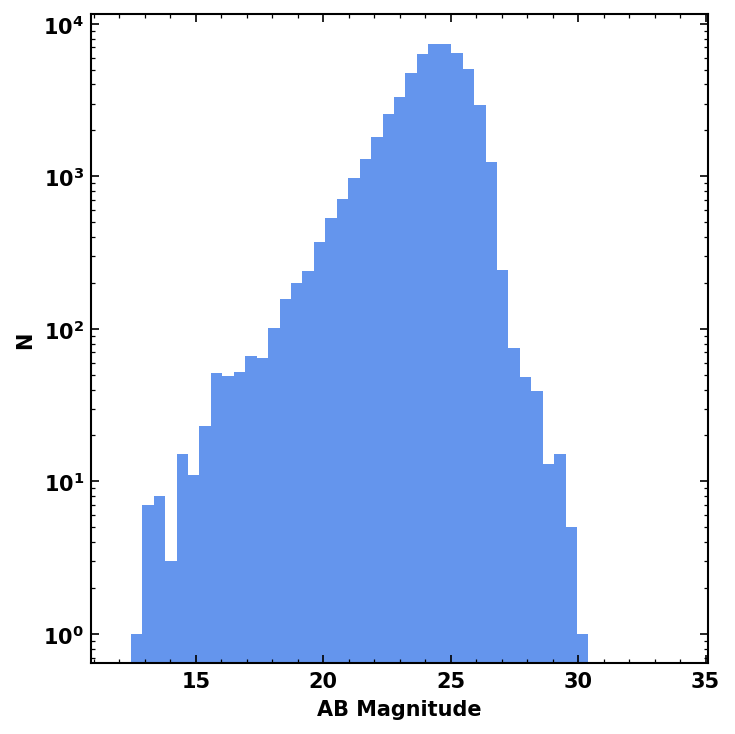

In [24]:

bins = np.linspace(12,34,50)
plt.figure(figsize=(5,5))
plt.hist(simulated_catalogue['MAG'], bins=bins,color='cornflowerblue')
#plt.step(Provided_cat['MAG_AB'], bins=bins,color='orange')
plt.xlabel('AB Magnitude')
plt.ylabel('N')
plt.yscale('log')
plt.savefig('figures/Simulated_mag_dist_KiDS.svg',dpi=300)
plt.show()

In [25]:
# remove infinities
# remove mags that are less than 0

#matched_catalogue = matched_catalogue[matched_catalogue['MAG_flux'] > 0]

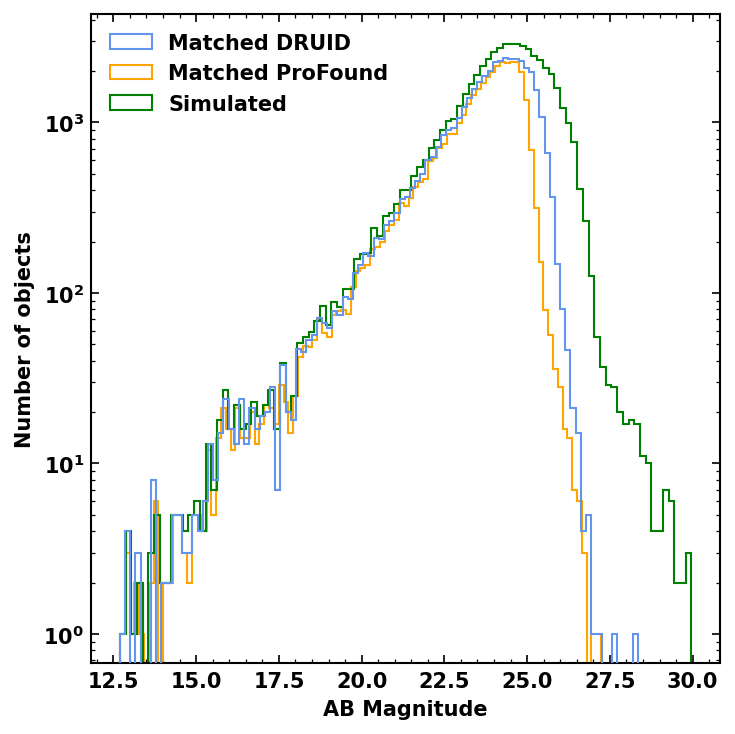

In [35]:
plt.figure(figsize=(5,5))
plt.hist(matched_catalogue['MAG'], bins=100, label='Matched DRUID',histtype='step',color='cornflowerblue',zorder=10)
plt.hist(matched_catalogue_ProFound['MAG_1'], bins=100, label='Matched ProFound',histtype='step',color='orange')
plt.hist(simulated_catalogue['MAG'], bins=100, label='Simulated',histtype='step',color='green')
plt.xlabel('AB Magnitude')
plt.ylabel('Number of objects')
plt.yscale('log')
plt.legend(loc='upper left')
plt.savefig('figures/Simulated_mag_dist_KiDS_matched_distributions.svg',dpi=300)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


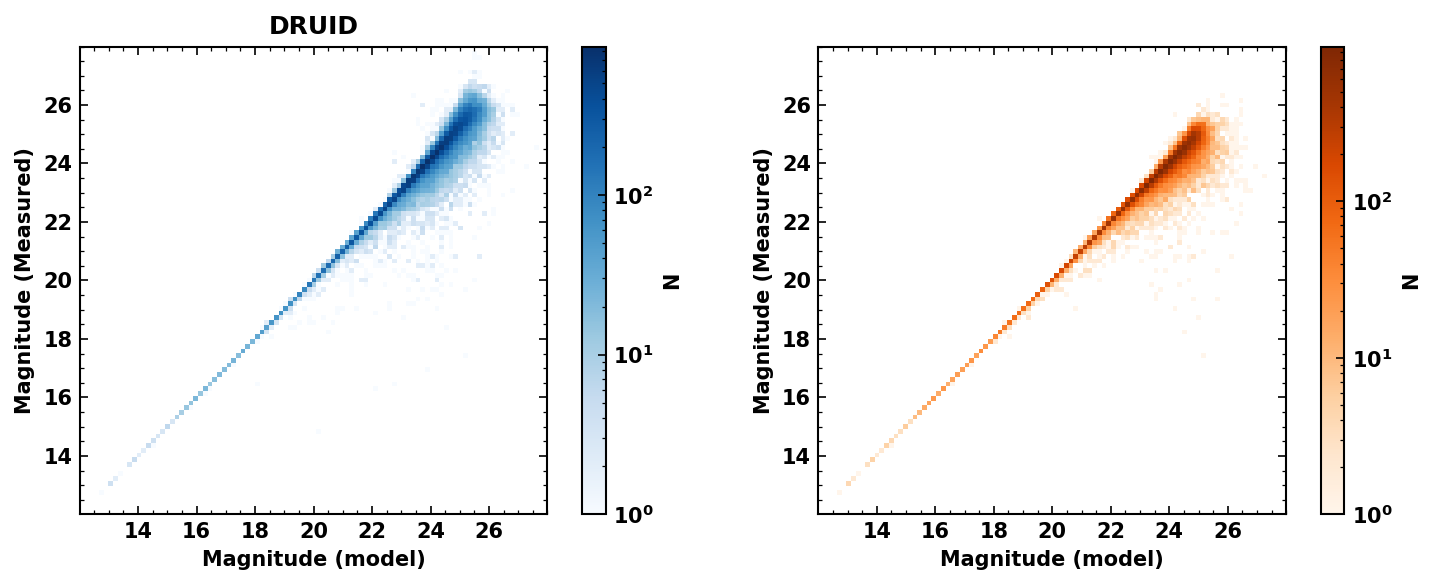

In [27]:
from matplotlib.colors import LogNorm
bins = np.linspace(12, 28, 100)
hist_2d_DRUID, xedges, yedges = np.histogram2d(matched_catalogue['MAG_flux'], matched_catalogue['MAG'], bins=bins)
hist_2d_ProFound, xedges, yedges = np.histogram2d(matched_catalogue_ProFound['mag_2'], matched_catalogue_ProFound['MAG_1'], bins=bins)
fig,ax = plt.subplots(1,2,figsize=(10,4))
#plt.scatter(matched_catalogue['MAG_model'], matched_catalogue['MAG_flux'], s=1, label='Blue DRUID',alpha=0.1)
#plt.scatter(matched_catalogue_ProFound['MAG'], matched_catalogue_ProFound['mag'], s=1, label='Orange ProFound',alpha=0.1)
DRUID = ax[0].imshow(hist_2d_DRUID, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='Blues', norm=LogNorm())
PROFOUND = ax[1].imshow(hist_2d_ProFound, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='Oranges', norm=LogNorm())
ax[0].set_xlabel('Magnitude (model)')
ax[0].set_ylabel('Magnitude (Measured)')
ax[1].set_xlabel('Magnitude (model)')
ax[1].set_ylabel('Magnitude (Measured)')

x = np.linspace(12, 28, 3)
y1 = x + 0.5
y2 = x - 0.5
y = x
ax[0].set_title('DRUID')
# ax[1].set_title('ProFound')
# ax[0].plot(x, y1, color='gray',linestyle='-.',label='x+0.5',marker='',alpha=0.3)
# # ax[0].plot(x, y2, color='gray',linestyle='-.',label='x-0.5',marker='',alpha=0.3)
# ax[0].plot(x, y, color='gray',linestyle='--',label='y=x',marker='',alpha=0.3)
# ax[1].plot(x, y, color='gray',linestyle='--',label='y=x',marker='',alpha=0.3)
# ax[1].plot(x, y1, color='gray',linestyle='--',label='x+0.5',marker='',alpha=0.3)
# ax[1].plot(x, y2, color='gray',linestyle='-.',label='x-0.5',marker='',alpha=0.3)
ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')
ax[0].set_xlim(12,28)
ax[0].set_ylim(12,28)
ax[1].set_xlim(12,28)
ax[1].set_ylim(12,28)
# edit the ticks 
ax[0].set_xticks(np.arange(14,28,2))
ax[0].set_yticks(np.arange(14,28,2))
ax[1].set_xticks(np.arange(14,28,2))
ax[1].set_yticks(np.arange(14,28,2))
# add a colour bar not larger than the plot
fig.colorbar(DRUID, ax=ax[0], shrink=1, label='N')
fig.colorbar(PROFOUND, ax=ax[1], shrink=1, label='N')
plt.savefig('figures/Simulated_mag_dist_KiDS_matched_distributions_2dhist_DRUID_PROFOUND.svg',dpi=300)
plt.show()

In [28]:
matched_catalogue['MAG_diff_frac'] = (matched_catalogue['MAG_flux'] - matched_catalogue['MAG'])/matched_catalogue['MAG']

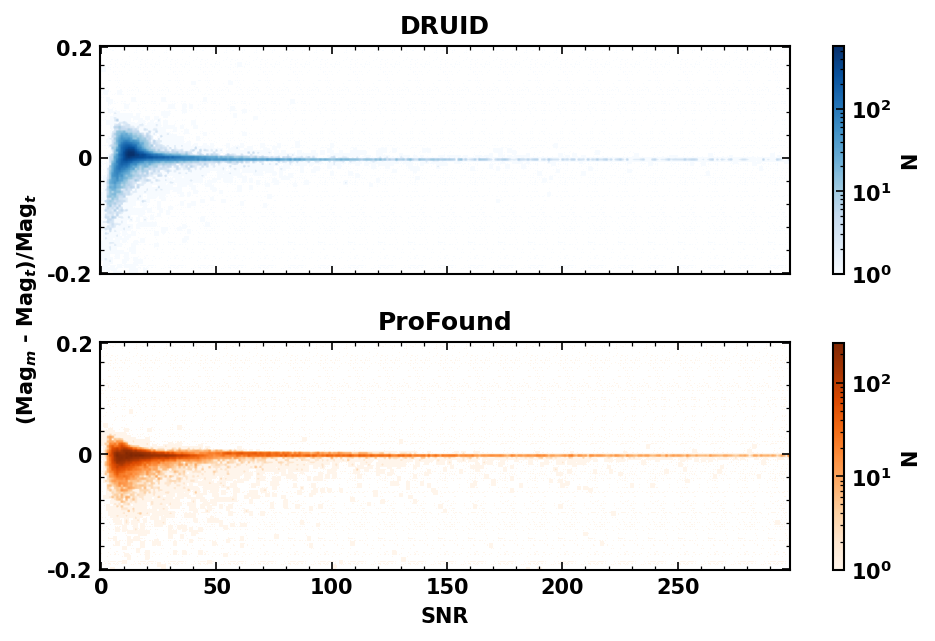

In [29]:
import numpy as np
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
matched_catalogue_ProFound['Mag_diff'] = (matched_catalogue_ProFound['mag_2'] - matched_catalogue_ProFound['MAG_1'])/matched_catalogue_ProFound['MAG_1']
matched_catalogue_ProFound['SNR'] = matched_catalogue_ProFound['flux_2']/matched_catalogue_ProFound['flux_err']
#plot mag diff vs snr
#matched_catalogue['SNR'] = matched_catalogue['Flux_total']/(matched_catalogue['Area']*5E-13)
fig,ax = plt.subplots(2,1,sharex=True)
# Create 2D histogram for DRUID
# Create 2D histogram for DRUID
bins_snr = np.linspace(0,300,300)
bins_mag = np.linspace(-0.15,0.15,100)
# create a consistent colour map

hist1, xedges1, yedges1 = np.histogram2d(matched_catalogue['SNR'], matched_catalogue['MAG_diff_frac'], bins=(bins_snr,bins_mag))
image1 = ax[0].imshow(hist1.T, origin='lower',cmap='Blues', norm=LogNorm())
# # Create 2D histogram for ProFound
hist2, xedges2, yedges2 = np.histogram2d(abs(matched_catalogue_ProFound['SNR']), matched_catalogue_ProFound['Mag_diff'], bins=(bins_snr,bins_mag))
image2 = ax[1].imshow(hist2.T, origin='lower',cmap='Oranges', norm=LogNorm())
# change the tic
# change the y tick labels 
# # Set the common y-label
# label 50 as 0
ax[0].set_yticks([0,50,98],[-0.2,0,0.2])
ax[1].set_yticks([0,50,98],[-0.2,0,0.2])
ax[0].set_xticks([0,50,100,150,200,250],[0,50,100,150,200,250])
ax[1].set_xticks([0,50,100,150,200,250],[0,50,100,150,200,250])
# add 0 line
# ax[0].axhline(y=50, color='gray', linestyle='--',alpha=0.5)
# ax[1].axhline(y=50, color='gray', linestyle='--',alpha=0.5)

# show colour bar
fig.colorbar(image1, ax=ax[0], shrink=0.6, label='N',ticks=[1,10,100])
fig.colorbar(image2, ax=ax[1], shrink=0.6, label='N',ticks=[1,10,100])

plt.setp(ax[0].get_xticklabels(), visible=False)

fig.text(-0.01, 0.5, '(Mag$_{m}$ - Mag$_{t}$)/Mag$_{t}$', va='center', rotation='vertical')

fig.subplots_adjust(hspace=0)
# set titles
ax[0].set_title('DRUID')
ax[1].set_title('ProFound')
#plt.ylabel('Mag$_{d}$ - Mag$_{t}$/Mag$_{t}$')
plt.xlabel('SNR')
plt.tight_layout()
plt.savefig('figures/Simulated_mag_dist_KiDS_matched_distributions_SNR.svg', dpi=300)
plt.savefig('figures/Simulated_mag_dist_KiDS_matched_distributions_SNR.png', dpi=300)
plt.show()

/tmp/ipykernel_60150/532088746.py:9: RuntimeWarning: invalid value encountered in divide
  completeness = Match_hist/Sim_hist
/tmp/ipykernel_60150/532088746.py:10: RuntimeWarning: invalid value encountered in divide
  completeness_PF = PF_Match_hist/Sim_hist


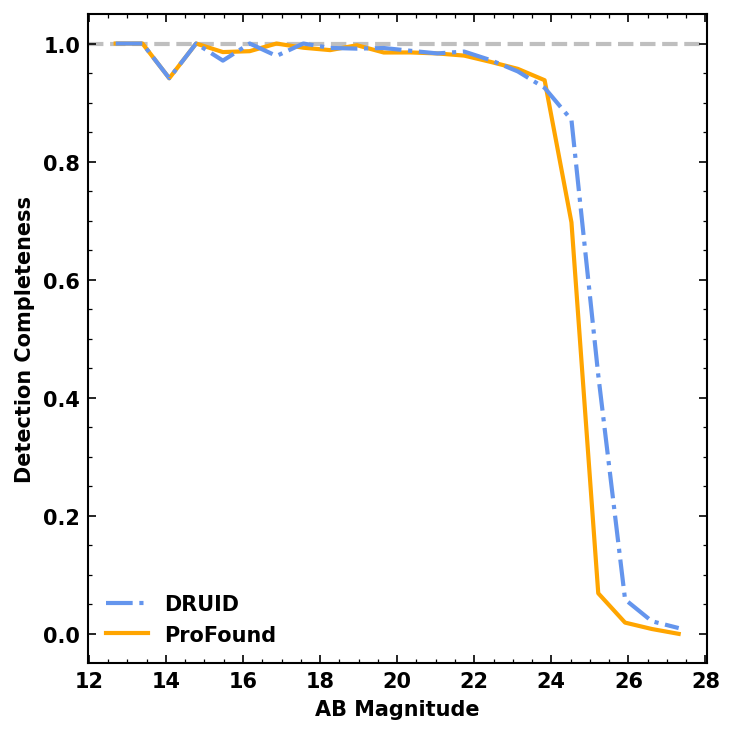

In [34]:
## HERE DRUID MAY BE MISSING SOURCES BECAUSE OF THE CHOISE OF CLASSES? 
## Here we matche the Segstats from profound rather than the groupstats. 

bins = np.linspace(12, 28, 24)
plt.figure(figsize=(5,5))
Sim_hist, bins = np.histogram(simulated_catalogue['MAG'], bins=bins)
Match_hist, bins = np.histogram(matched_catalogue['MAG'], bins=bins)
PF_Match_hist, bins = np.histogram(matched_catalogue_ProFound['MAG_1'], bins=bins)
completeness = Match_hist/Sim_hist
completeness_PF = PF_Match_hist/Sim_hist
plt.plot(bins[:-1], completeness, label='DRUID',zorder = 2,marker='',color='cornflowerblue',linestyle='-.')
plt.axhline(y=1, color='gray', linestyle='--',alpha=0.5,marker='',zorder=0)
plt.plot(bins[:-1], completeness_PF, label='ProFound',zorder = 1,marker='',color='orange')
plt.xlabel('AB Magnitude')
plt.ylabel('Detection Completeness')
plt.legend()
plt.savefig('figures/Simulated_mag_dist_KiDS_matched_distributions_completeness.svg',dpi=300)
plt.show()

In [10]:
# open ProFound catalogue text file and save as fits table with astropy
# import pandas as pd
# import numpy as np

# table = pd.read_csv('ProFound_Catalogue_segstats_Sims_seed.fits',sep='\s+')
# table


# # convert to astropy table
# from astropy.table import Table
# table = Table.from_pandas(table)
# table.write('ProFound_Catalogue_segstats_Sims_seed.fits',overwrite=True)


In [11]:
# open PRofound Fits
# from astropy.table import Table
# from astropy.wcs import WCS
# import astropy

# def get_radec(header,x,y):
    
#     wcs = WCS(header)
#     RA, DEC = wcs.all_pix2world(x,y,0)
#     return RA, DEC
# header = astropy.io.fits.getheader('Sim_imageKIds_combined.fits')
# ProFound_catalogue = Table.read('ProFound_Catalogue_segstats_Sims_seed.fits').to_pandas()
# RA, DEC = get_radec(header,ProFound_catalogue['xcen'],ProFound_catalogue['ycen'])
# ProFound_catalogue['RAcen'] = RA
# ProFound_catalogue['Decen'] = DEC
# # save as fits table
# ProFound_catalogue = Table.from_pandas(ProFound_catalogue)
# ProFound_catalogue.write('ProFound_Catalogue_segstats_Sims_seed.fits',overwrite=True)